In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

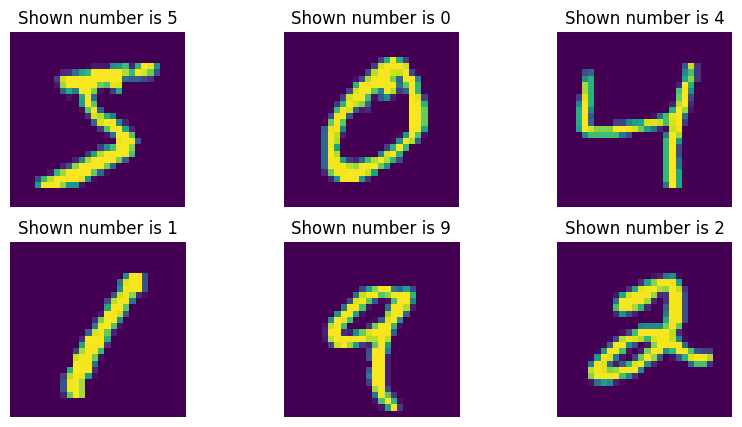

In [16]:
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i])
  plt.title("Shown number is {}".format(y_train[i]))
  plt.axis('off')
  #plt.tight_layout()
plt.show()

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# scalling
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [26]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              9438208   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                      

In [29]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=5,batch_size=32)

Epoch 1/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4408 - accuracy: 0.8730 - val_loss: 0.2126 - val_accuracy: 0.9371
Epoch 2/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1584 - accuracy: 0.9525 - val_loss: 0.1384 - val_accuracy: 0.9582
Epoch 3/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1132 - accuracy: 0.9648 - val_loss: 0.1184 - val_accuracy: 0.9637
Epoch 4/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0904 - accuracy: 0.9721 - val_loss: 0.1056 - val_accuracy: 0.9675
Epoch 5/5
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0725 - accuracy: 0.9780 - val_loss: 0.1031 - val_accuracy: 0.9692


In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0986 - accuracy: 0.9679


[0.09863104671239853, 0.9678999781608582]

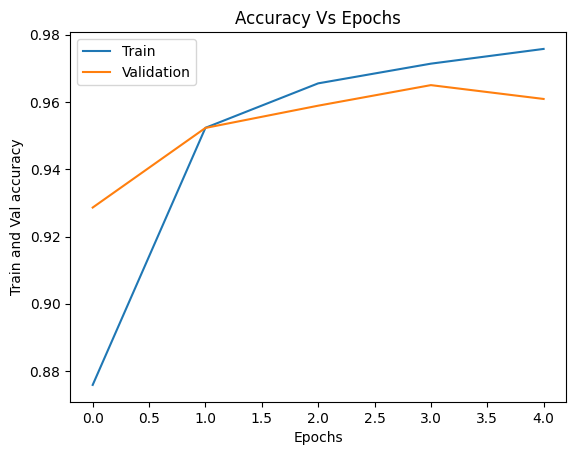

In [23]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Train and Val accuracy')
plt.title('Accuracy Vs Epochs')
plt.legend()

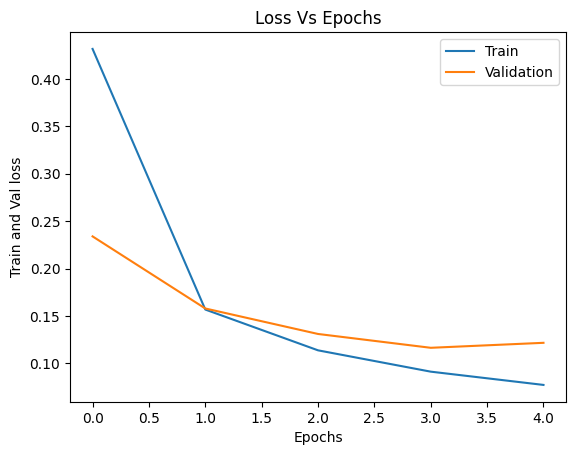

In [24]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Train and Val loss')
plt.title('Loss Vs Epochs')
plt.legend()

In [30]:
model.save('tensorflow.h5')